In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("ShippingData1.csv")

In [12]:
data.head()

,CONTAINER_ID,LINE_CODE,CONTAINER_DATE,DATE,DAY,TIME,AM/PM,CONTAINER_TYPE_CODE,CONTAINER_TYPE,CONTAINER_ISO_CODE,CONTAINER_LENGTH,CONTAINER_HEIGHT,CONTAINER_WIDTH,VENTILATION,DANGEROUS_TRANSPORT,DESIGNATION_CODE,DESIGNATION,TIME_24HR
0,TRLU5869252,HLL,2/3/2024 0:01,2/3/2024,Saturday,12:01:00,AM,HC,High Cubed,45G1,40,9'6'',8,No Ventilation,No,MT,Empty,00:01:00
1,WIKU5201240,MLH,6/21/2024 12:34,6/21/2024,Friday,12:34:00,PM,HC,High Cubed,45G1,40,9'6'',8,No Ventilation,No,EXP,Export Service,12:34:00
2,ESDU4075587,ESL,7/15/2024 12:21,7/15/2024,Monday,12:21:00,PM,HC,High Cubed,45G1,40,9'6'',8,No Ventilation,No,T/S,Transhipment,12:21:00
3,WFHU5195877,ESL,7/15/2024 12:21,7/15/2024,Monday,12:21:00,PM,HC,High Cubed,45G1,40,9'6'',8,No Ventilation,No,T/S,Transhipment,12:21:00
4,GCSU2021209,NVSL,8/3/2024 10:15,8/3/2024,Saturday,10:15:00,AM,STD,Standard,22G1,20,8'6'',8,No Ventilation,No,EXP,Export Service,10:15:00


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CONTAINER_ID         1000 non-null   object
 1   LINE_CODE            1000 non-null   object
 2   CONTAINER_DATE       1000 non-null   object
 3   DATE                 1000 non-null   object
 4   DAY                  1000 non-null   object
 5   TIME                 1000 non-null   object
 6   AM/PM                1000 non-null   object
 7   CONTAINER_TYPE_CODE  1000 non-null   object
 8   CONTAINER_TYPE       1000 non-null   object
 9   CONTAINER_ISO_CODE   1000 non-null   object
 10  CONTAINER_LENGTH     1000 non-null   int64 
 11  CONTAINER_HEIGHT     1000 non-null   object
 12  CONTAINER_WIDTH      1000 non-null   int64 
 13  VENTILATION          1000 non-null   object
 14  DANGEROUS_TRANSPORT  1000 non-null   object
 15  DESIGNATION_CODE     1000 non-null   object
 16  DESIGNA

In [14]:
import numpy as np

In [15]:
# Convert TIME into hour ranges
data['HOUR'] = pd.to_datetime(data['TIME_24HR']).dt.hour

C:\Users\2104035361\AppData\Local\Temp\ipykernel_5584\3799768241.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HOUR'] = pd.to_datetime(data['TIME_24HR']).dt.hour


In [16]:
# Encode DAY numerically
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
               'Friday': 5, 'Saturday': 6, 'Sunday': 7}
data['DAY_NUMERIC'] = data['DAY'].map(day_mapping)

In [17]:
# One-hot encode CONTAINER_TYPE_CODE
data = pd.get_dummies(data, columns=['CONTAINER_TYPE_CODE'], drop_first=True)

In [18]:
# One-hot encode DESIGNATION
data = pd.get_dummies(data, columns=['DESIGNATION'], drop_first=True)

In [19]:
# One-hot encode VENTILATION
data = pd.get_dummies(data, columns=['VENTILATION'], drop_first=True)

In [20]:
data.head()

,CONTAINER_ID,LINE_CODE,CONTAINER_DATE,DATE,DAY,TIME,AM/PM,CONTAINER_TYPE,CONTAINER_ISO_CODE,CONTAINER_LENGTH,...,CONTAINER_TYPE_CODE_REF,CONTAINER_TYPE_CODE_STD,CONTAINER_TYPE_CODE_TNK,DESIGNATION_Export Service,DESIGNATION_Transhipment,VENTILATION_Pressurized,VENTILATION_Refrigerated,VENTILATION_Refrigerated and Heated,VENTILATION_Thermal,VENTILATION_Ventilated
0,TRLU5869252,HLL,2/3/2024 0:01,2/3/2024,Saturday,12:01:00,AM,High Cubed,45G1,40,...,False,False,False,False,False,False,False,False,False,False
1,WIKU5201240,MLH,6/21/2024 12:34,6/21/2024,Friday,12:34:00,PM,High Cubed,45G1,40,...,False,False,False,True,False,False,False,False,False,False
2,ESDU4075587,ESL,7/15/2024 12:21,7/15/2024,Monday,12:21:00,PM,High Cubed,45G1,40,...,False,False,False,False,True,False,False,False,False,False
3,WFHU5195877,ESL,7/15/2024 12:21,7/15/2024,Monday,12:21:00,PM,High Cubed,45G1,40,...,False,False,False,False,True,False,False,False,False,False
4,GCSU2021209,NVSL,8/3/2024 10:15,8/3/2024,Saturday,10:15:00,AM,Standard,22G1,20,...,False,True,False,True,False,False,False,False,False,False


In [21]:
data['HOUR']

0       0
1      12
2      12
3      12
4      10
       ..
995     8
996     9
997    10
998    10
999    10
Name: HOUR, Length: 1000, dtype: int32

In [22]:
# Define a time window for the target variable
# Example: Time window 8:00 AM to 12:00 PM
data['TARGET'] = np.where((data['HOUR'] >= 8) & (data['HOUR'] < 12), 1, 0)

In [23]:
data['TARGET']

0      0
1      0
2      0
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: TARGET, Length: 1000, dtype: int32

In [24]:
# Feature scaling for height column
scaler = MinMaxScaler()
data[['CONTAINER_LENGTH']] = scaler.fit_transform(data[['CONTAINER_LENGTH']])

In [25]:
data['CONTAINER_LENGTH'].unique()

array([0.8, 0. , 1. ])

In [26]:
# Drop DESIGNATION_CODE explicitly
data = data.drop(columns=['DESIGNATION_CODE'], errors='ignore')

In [27]:
X = data[['HOUR', 'DAY_NUMERIC', 'CONTAINER_LENGTH'] +
         [col for col in data.columns if col.startswith('CONTAINER_TYPE_CODE_') or 
                                         col.startswith('VENTILATION_') or 
                                         col.startswith('DESIGNATION_')]]
y = data['TARGET']

In [28]:
X

,HOUR,DAY_NUMERIC,CONTAINER_LENGTH,CONTAINER_TYPE_CODE_HRF,CONTAINER_TYPE_CODE_OS,CONTAINER_TYPE_CODE_OT,CONTAINER_TYPE_CODE_REF,CONTAINER_TYPE_CODE_STD,CONTAINER_TYPE_CODE_TNK,DESIGNATION_Export Service,DESIGNATION_Transhipment,VENTILATION_Pressurized,VENTILATION_Refrigerated,VENTILATION_Refrigerated and Heated,VENTILATION_Thermal,VENTILATION_Ventilated
0,0,6,0.8,False,False,False,False,False,False,False,False,False,False,False,False,False
1,12,5,0.8,False,False,False,False,False,False,True,False,False,False,False,False,False
2,12,1,0.8,False,False,False,False,False,False,False,True,False,False,False,False,False
3,12,1,0.8,False,False,False,False,False,False,False,True,False,False,False,False,False
4,10,6,0.0,False,False,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8,5,0.0,False,False,False,False,True,False,True,False,False,False,False,False,False
996,9,5,0.8,False,False,False,False,False,False,False,True,False,False,False,False,False
997,10,5,0.8,False,False,False,False,False,False,False,False,False,False,False,False,False
998,10,5,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
# Check the data types of X_train
print(X_train.dtypes)

# Identify non-numerical columns in X_train
non_numeric_columns = X_train.select_dtypes(include=['object']).columns
print("Non-numerical columns:", non_numeric_columns)

# Check unique values in the non-numerical columns (if any exist)
for col in non_numeric_columns:
    print(f"Unique values in {col}: {X_train[col].unique()}")

HOUR                                     int32
DAY_NUMERIC                              int64
CONTAINER_LENGTH                       float64
CONTAINER_TYPE_CODE_HRF                   bool
CONTAINER_TYPE_CODE_OS                    bool
CONTAINER_TYPE_CODE_OT                    bool
CONTAINER_TYPE_CODE_REF                   bool
CONTAINER_TYPE_CODE_STD                   bool
CONTAINER_TYPE_CODE_TNK                   bool
DESIGNATION_Export Service                bool
DESIGNATION_Transhipment                  bool
VENTILATION_Pressurized                   bool
VENTILATION_Refrigerated                  bool
VENTILATION_Refrigerated and Heated       bool
VENTILATION_Thermal                       bool
VENTILATION_Ventilated                    bool
dtype: object
Non-numerical columns: Index([], dtype='object')


In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [33]:
y_pred_proba

array([8.99393101e-01, 6.37675652e-01, 8.35922999e-03, 8.99393101e-01,
       8.99393101e-01, 7.52418471e-02, 5.47193859e-01, 3.75994229e-02,
       2.17967368e-01, 1.54226178e-01, 8.15594892e-01, 9.24245980e-02,
       3.24722282e-01, 8.79101258e-01, 5.47193859e-01, 6.87783949e-01,
       7.19369693e-01, 2.48224408e-01, 3.43540806e-01, 5.47193859e-01,
       6.65188555e-01, 8.76868389e-03, 6.87783949e-01, 6.42677674e-02,
       7.19369693e-01, 1.54226178e-01, 2.52583563e-03, 2.92419195e-01,
       3.47776049e-01, 9.24245980e-02, 1.92997353e-01, 2.15675746e-02,
       7.91546915e-03, 4.02932565e-01, 5.57333949e-02, 2.01907335e-03,
       9.65432826e-01, 8.56588404e-01, 6.98056664e-01, 7.19369693e-01,
       2.01907335e-03, 8.79101258e-01, 9.39114646e-01, 8.35922999e-03,
       6.87783949e-01, 9.65432826e-01, 7.91991930e-01, 1.60629708e-01,
       6.87783949e-01, 9.36987154e-01, 8.53147721e-01, 5.47193859e-01,
       8.79101258e-01, 1.37682468e-01, 8.46994971e-01, 2.81161721e-01,
      

In [34]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.93
Precision: 0.8709677419354839
Recall: 0.9759036144578314
F1 Score: 0.9204545454545454
Confusion Matrix:
 [[105  12]
 [  2  81]]


In [35]:
# Define the new data point
new_data_point = pd.DataFrame([{
    'HOUR': 10,  # Example time (10 AM)
    'DAY_NUMERIC': 2,  # Tuesday
    # Adjust based on your standardized data. 
    # New container is now set to High Cubed, No ventilation, 40ft in length, bound for transhipment
    'CONTAINER_LENGTH': 0.8,  
    'CONTAINER_TYPE_CODE_HRF': 0,
    'CONTAINER_TYPE_CODE_OS': 0,
    'CONTAINER_TYPE_CODE_OT': 0,
    'CONTAINER_TYPE_CODE_REF': 0,
    'CONTAINER_TYPE_CODE_STD': 0,
    'CONTAINER_TYPE_CODE_TNK': 0,
    'VENTILATION_Pressurized': 0,
    'VENTILATION_Refrigerated': 0,
    'VENTILATION_Refrigerated and Heated': 0,
    'VENTILATION_Thermal': 0,
    'VENTILATION_Ventilated': 0,
    'DESIGNATION_Export Service': 0,
    'DESIGNATION_Transhipment': 1
}])

In [36]:
new_data_point

,HOUR,DAY_NUMERIC,CONTAINER_LENGTH,CONTAINER_TYPE_CODE_HRF,CONTAINER_TYPE_CODE_OS,CONTAINER_TYPE_CODE_OT,CONTAINER_TYPE_CODE_REF,CONTAINER_TYPE_CODE_STD,CONTAINER_TYPE_CODE_TNK,VENTILATION_Pressurized,VENTILATION_Refrigerated,VENTILATION_Refrigerated and Heated,VENTILATION_Thermal,VENTILATION_Ventilated,DESIGNATION_Export Service,DESIGNATION_Transhipment
0,10,2,0.8,0,0,0,0,0,0,0,0,0,0,0,0,1


In [64]:
# Reorder columns to match training data (X.columns)
new_data_point = new_data_point[X.columns]

# Predict the probability using the trained model
likelihood = model.predict_proba(new_data_point)[:, 1]  # Probability of class 1 (container arrives)
print(f"Likelihood of this container arriving based on set date and time is: {likelihood[0]:.2f}")

Likelihood of this container arriving based on set date and time is: 0.77


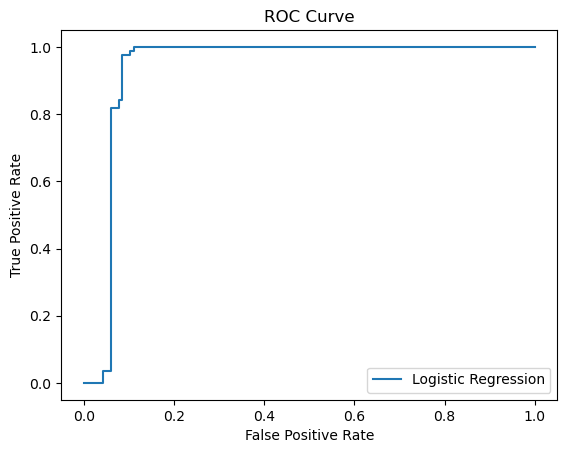

AUC Score: 0.9358459478941407


In [66]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Compute the AUC score
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))